In [36]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords

> Premise: If 'whitening' and ... (another term) are supposed to be avoided, what is used instead? We search for 'lightening' creams to see what words appear. Ultimately we'll use about four searches for the main synonyms.

## Import and clean

In [37]:
path = '/Users/Prakriti/Desktop/'
file = 'final_amazon_cream_data.csv'
df = pd.read_csv(path + file)
print(df.shape)
df.sample(3)

(500, 7)


,product,price,benefits,use,description,link,keyword
216,Dr.Rashel Vitamin C Day Cream BRIGHTENING & AN...,247,Brightening,Face,Dr.Rashel Vitamin C Day Cream anti-aging moist...,https://www.amazon.in/BRIGHTENING-ANTI-AGING-N...,brightening
368,Aryanveda Unisex White Glow Whitofair SPF 50 F...,492,Brightening,Face,The whitofair face cream by aryanveda offers l...,https://www.amazon.in/Aryanveda-Whiteglow-Whit...,illuminating
11,Sukin Purely Ageless Rejuvenating Day Cream 12...,"1,979","Plumps & Hydrates the Skin, Makes Skin Feel Mo...",Face,Say hello to our Purely Ageless Rejuvenating D...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening


In [38]:
# remove commas and cast price column to integer type

df.price = df.price.str.replace(',', '').astype(int)


In [39]:
# df.product is causing problems so 'product' might be a method... change header to 'item'

df.rename(columns = {'product':'item'}, inplace = True)

In [40]:
df[:3]

,item,price,benefits,use,description,link,keyword
0,Bella Vita Organic C Glow Oil Control Hydratio...,239,Controls excess oil production,Face,Made with natural ingredients: The Bella Vita ...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening
1,Sanfe Promise Vitamin C Neck Glow Cream | Neck...,299,Controls excess oil production,Face,"AHA : Promote cell turnover, collagen producti...",https://www.amazon.in/gp/slredirect/picassoRed...,lightening
2,Blue Nectar Ayurvedic Sandalwood Radiance and ...,845,Controls excess oil production,Face,SKIN BRIGHTENING DAY CREAM –Mysorean Sandalwoo...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening


## all language used in 3 columns: item, benefits, description


In [41]:
# cast the text in the three columns that interest us to a single list

all_items = df.item.tolist()
all_benefits = df.benefits.tolist()
all_desc = df.description.tolist()
total_list = [all_items, all_benefits, all_desc]
flat_list = [item for sublist in total_list for item in sublist]

In [42]:
len(flat_list)

1500

In [43]:
# instances from 'flat_list'

print(flat_list[5])
print(flat_list[50])

Kozicare Skin Lightening Cream Enriched with 3% Kojic Acid, 1% Alpha Arbutin, 1% Glutathione, 2% Niacinamide, 2% Vitamin C, 0.5% Mulberry Extract, 0.5% Liquorice | Best for Melasma, Pigmentation, Acne Scar, Dark/Age Spots, Uneven Skin Shade - 15gm
7 Days V-Whitening Cream for Sensitive Skin, Lightening & Whitening Cream for Women- 100g


In [44]:
# put all the words in a single list - and lowercase them all at the same time

words = []

for x in flat_list:
# used str(x).split instead of x.strip due to attribute error float object has no attribute split
    line = str(x).split()
    for y in line:
        y = y.lower()
        words.append(y)
        
print(len(words))

52378


In [45]:
# remove numbers and punctuation characters

words = [t for t in words if t.isalpha()]

print(len(words))

42128


In [46]:
# set the stop words

stop_words = set(stopwords.words('english')) 


In [47]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:
# pull stopwords from the list of words

word_list = [x for x in words if x not in stop_words]

print(len(word_list))


29517


In [49]:
# find other terms and random letters than can be removed from the word list

word_list[-2000:-1000]

# c, gm, e, spf, l, e, pa, g, b, x

['harmful',
 'uva',
 'uvb',
 'also',
 'property',
 'forms',
 'sheild',
 'environmental',
 'vitamin',
 'cream',
 'comes',
 'dual',
 'power',
 'contains',
 'yuzu',
 'lemon',
 'known',
 'skin',
 'brigjtening',
 'fading',
 'dark',
 'spots',
 'blemishes',
 'kakadu',
 'plum',
 'known',
 'powerhouse',
 'contains',
 'orange',
 'vitamin',
 'c',
 'cream',
 'light',
 'suitable',
 'skin',
 'types',
 'gives',
 'natural',
 'glowing',
 'skin',
 'regular',
 'better',
 'results',
 'follow',
 'complete',
 'whiteglow',
 'radiance',
 'regime',
 'contanis',
 'wahs',
 'skin',
 'whiteglow',
 'radiance',
 'apply',
 'drops',
 'whiteglow',
 'gold',
 'radiance',
 'face',
 'oil',
 'moisturise',
 'whiteglow',
 'rdaiance',
 'bye',
 'bye',
 'light',
 'weight',
 'cream',
 'best',
 'dark',
 'spots',
 'blemishes',
 'quickly',
 'gets',
 'absorbed',
 'skin',
 'fades',
 'spots',
 'away',
 'regular',
 'use',
 'revealing',
 'brighter',
 'radiant',
 'skin',
 'day',
 'chemical',
 'free',
 'cream',
 'specially',
 'crafted',
 '

In [50]:
# pull ALL instances of certain terms from the word list (currently at ____ length)

more_exc = ["â", "c", "gm", "e", "spf", "l", "pa", "g", "b", "x", "ml"]

for x in more_exc:
    word_list = list(filter((x).__ne__, word_list))
    
print(len(word_list))

28954


In [51]:
# check if the list still contains a term we've just removerd

test = 'ml'
word_list.index(test)

ValueError: 'ml' is not in list

In [52]:
# there are 28954 words in our list

word_list

['bella',
 'vita',
 'organic',
 'glow',
 'oil',
 'control',
 'hydration',
 'anti',
 'pigmentation',
 'blemish',
 'cream',
 'face',
 'gel',
 'dark',
 'spot',
 'glowing',
 'lightening',
 'vitamin',
 'aloe',
 'papaya',
 'turmeric',
 'sanfe',
 'promise',
 'vitamin',
 'neck',
 'glow',
 'cream',
 'neck',
 'lightening',
 'moisturizer',
 'hard',
 'skin',
 'skin',
 'aha',
 'promotes',
 'skin',
 'healing',
 'lightening',
 'blue',
 'nectar',
 'ayurvedic',
 'sandalwood',
 'radiance',
 'skin',
 'brightening',
 'cream',
 'moisturizing',
 'day',
 'cream',
 'women',
 'daily',
 'use',
 'face',
 'cream',
 'women',
 'sun',
 'protection',
 'herbs',
 'nisglow',
 'cream',
 'radiant',
 'azani',
 'intimate',
 'area',
 'lightening',
 'whitening',
 'cream',
 'bikini',
 'intimate',
 'elbow',
 'intense',
 'dark',
 'spot',
 'removal',
 'kojic',
 'niacinamide',
 'women',
 'men',
 'kozicare',
 'skin',
 'lightening',
 'cream',
 'enriched',
 'kojic',
 'alpha',
 'vitamin',
 'mulberry',
 'liquorice',
 'best',
 'acne',
 

In [53]:
# how many DIFFERENT words are there in our list? 2651

len(set(word_list))


2651

In [54]:
# Only around 500 terms occur more than three times

Counter(word_list).most_common(500)

# NOTE There are 133 occurences of 'whitening', 29 of 'whiteglow' and 21 of 'white',  - separate but important question, see below

[('skin', 2250),
 ('cream', 992),
 ('face', 516),
 ('vitamin', 412),
 ('natural', 368),
 ('brightening', 362),
 ('glow', 340),
 ('dark', 337),
 ('lightening', 246),
 ('helps', 229),
 ('spots', 197),
 ('free', 183),
 ('day', 182),
 ('tone', 176),
 ('oil', 173),
 ('moisturizer', 151),
 ('women', 141),
 ('ingredients', 140),
 ('even', 136),
 ('whitening', 133),
 ('radiance', 125),
 ('glowing', 123),
 ('contains', 123),
 ('gel', 120),
 ('formula', 118),
 ('daily', 116),
 ('use', 116),
 ('radiant', 110),
 ('types', 105),
 ('acid', 104),
 ('reduces', 104),
 ('night', 103),
 ('gives', 103),
 ('men', 97),
 ('made', 97),
 ('sun', 95),
 ('suitable', 95),
 ('acne', 94),
 ('pigmentation', 93),
 ('dry', 92),
 ('serum', 90),
 ('protects', 90),
 ('hydration', 87),
 ('hydrating', 86),
 ('also', 85),
 ('provides', 83),
 ('light', 80),
 ('like', 79),
 ('appearance', 76),
 ('apply', 76),
 ('oily', 75),
 ('illuminating', 75),
 ('brightens', 74),
 ('damage', 74),
 ('help', 74),
 ('fine', 73),
 ('evens', 73

In [55]:
# build df from the 500 most common

df_count = pd.DataFrame(Counter(word_list).most_common(500))
df_count.columns = ['term', 'counts']

In [56]:
# ordered alphabetically we can review the terms

for x in df_count.sort_values('term').term:
    print(x)

absorbed
absorbing
absorbs
according
acid
acids
acne
active
address
adds
advance
advanced
age
ageing
agent
agents
aging
aha
almond
aloe
along
alpha
also
amount
animal
anti
antioxidant
antioxidants
appearance
apple
applied
apply
arbutin
area
areas
artificial
availability
away
ayurvedic
back
barrier
base
based
bb
beautiful
beauty
bella
best
better
biotique
bleaching
blemish
blemishes
blend
blended
blends
blue
body
boost
boosts
bright
brighten
brightening
brightens
brighter
brightness
brightning
brings
butter
care
cause
cell
cells
cellular
certified
chemical
chemicals
circles
circular
clean
cleansed
cleansing
clear
clinically
coconut
collagen
combination
comes
complete
completely
complex
complexion
concentrating
concerns
contain
contains
control
controls
country
coverage
crafted
cream
creams
creme
cruelty
crystal
crème
daily
damage
damaged
dark
darkening
day
days
dead
deep
deeply
delivers
depigmentation
derived
dermatologically
dermatologist
designed
dewy
diamond
drops
dry
dryness
due
dul

In [57]:
# check how a term is being used

df[df.item.str.contains('transparent',case=False,na=False)]
df[df.benefits.str.contains('transparent',case=False, na=False)]

# here, print out the full content of a cell
df[df.description.str.contains('transparent',case=False, na=False)].iat[0, 4]

'7 POWERFUL INGREDIENTS:\xa03% Kojic Acid, 1% Glutathione, 1% Alpha Arbutin, 2% Niacinamide, 2% Vitamin C,\xa0 2% Mulberry Extract, 0.5% Liquorice. More than 5,00,000 Customers has tried and experienced change Using our cream. FOR ALL AREAS - Can Be Used All Over the Body\xa0- Essential for making up those private areas such as the underarms, knees, elbows, neck, and in-between your legs. This skin cream helps brighten those dark spots and keep skin moisturized to maintain healthier skin. PROMOTES HEALTHY SKIN:\xa0\xa0Combination of 3% Kojic acid & 2% Vitamin C Helps to Brightens skin, Inhibits future appearance of scars. 1%\xa0Glutathione\xa0reduces oxidative stress in the body to improve your overall complexion, 2% Niacinamide helps build keratin , a type of protein that keeps your skin firm & healthy. BEST FOR:\xa0Suitable for All Skin Types. Age Spots, Sun Spots, Acne Scar, Melasma, Pigmentation, Discolouration, Uneven Skin shade. CLEAN & TRANSPARENT BEAUTY:\xa0\xa0We use Safe Ingr

In [58]:
# create a list of all the synonyms that reappear in the top 500

our_words = ['bright',
             'brighten',
             'brightening',
             'brightens',
             'brighter',
             'clarity',
             'depigmentation',
             'fade',
             'fading',
             'fair',
             'fairer',
             'fairness',
             'glow',
             'glowing',
             'illuminate',
             'light',
             'lightening',
             'lightens',
             'lighter',
             'lite',
             'pigmentation',
             'radiance',
             'radiant',
             'transparent',
             'white',
             'whitening'
            ]

len(our_words)

26

In [59]:
df_sel = df_count[df_count.term.isin(our_words) == True].sort_values('term')
df_sel

,term,counts
123,bright,45
104,brighten,48
5,brightening,362
52,brightens,74
83,brighter,58
367,depigmentation,15
243,fade,24
490,fading,11
228,fair,25
316,fairer,19


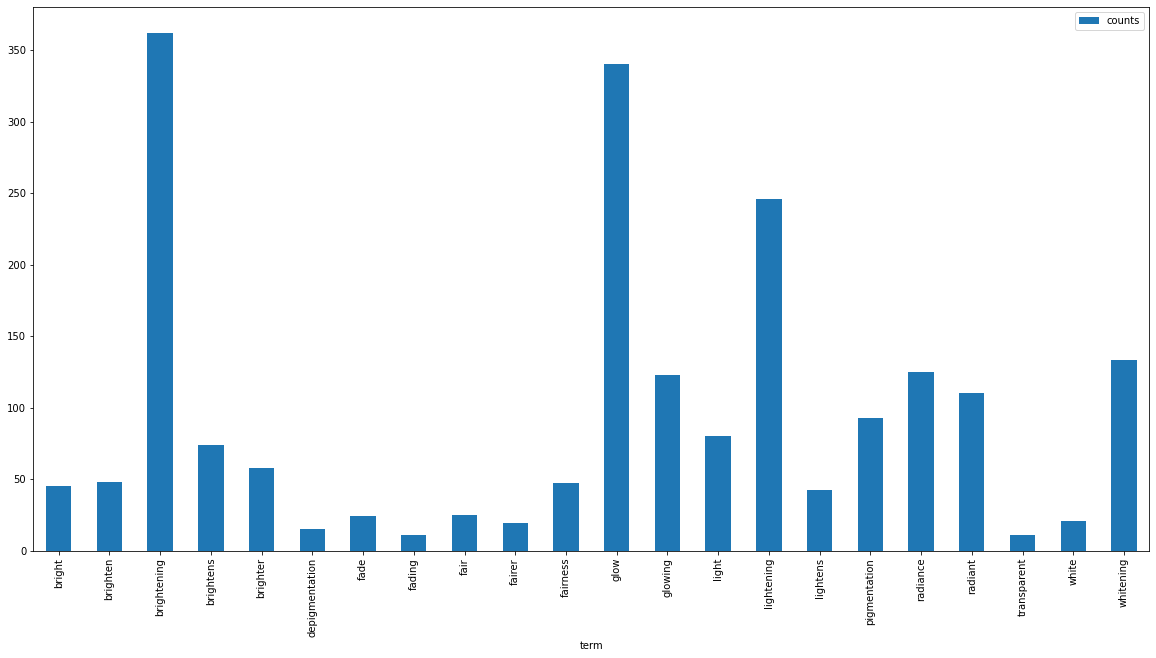

In [60]:

df_sel.plot.bar(x = 'term', y = 'counts', figsize = (20, 10));

In [61]:
df_sel.to_csv (r'C:\Users\Prakriti\Desktop\df_creams_topwords.csv', index = False, header=True)
# files.download('my_df.csv')


## find the whitening terms

> There are 133 occurences of 'whitening' and 21 of 'white'

In [62]:
df[:3]

,item,price,benefits,use,description,link,keyword
0,Bella Vita Organic C Glow Oil Control Hydratio...,239,Controls excess oil production,Face,Made with natural ingredients: The Bella Vita ...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening
1,Sanfe Promise Vitamin C Neck Glow Cream | Neck...,299,Controls excess oil production,Face,"AHA : Promote cell turnover, collagen producti...",https://www.amazon.in/gp/slredirect/picassoRed...,lightening
2,Blue Nectar Ayurvedic Sandalwood Radiance and ...,845,Controls excess oil production,Face,SKIN BRIGHTENING DAY CREAM –Mysorean Sandalwoo...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening


In [63]:
# remove PRINT and LEN to see the selection

print(len(df[df.item.str.contains('white ',case=False,na=False)]))
print(len(df[df.benefits.str.contains('white ',case=False,na=False)]))
print(len(df[df.description.str.contains('white ',case=False,na=False)]))

print(len(df[df.item.str.contains('whitening',case=False,na=False)]))
print(len(df[df.benefits.str.contains('whitening',case=False,na=False)]))
print(len(df[df.description.str.contains('whitening',case=False,na=False)]))

17
0
8
53
31
41


In [64]:
# for example

df[df.description.str.contains('white ',case=False,na=False)]

,item,price,benefits,use,description,link,keyword
11,Sukin Purely Ageless Rejuvenating Day Cream 12...,1979,"Plumps & Hydrates the Skin, Makes Skin Feel Mo...",Face,Say hello to our Purely Ageless Rejuvenating D...,https://www.amazon.in/gp/slredirect/picassoRed...,lightening
13,7 Days Whitening & Lightening Cream for Undera...,265,Anti-Aging,Whole Body,Under arm whitening cream is the only product ...,https://www.amazon.in/Whitening-Lightening-Und...,lightening
49,Classic White Cream Face Lightening Cream/ Ski...,299,"Lightening,Whitening",Face,Classic White Cream Herbal Cream Skin Lighiten...,https://www.amazon.in/Classic-White-Lightening...,lightening
116,Vigini Underarm Body Skin Lightening Brighteni...,299,Lightening Brightening Anti-Aging Moisturizing...,Whole Body,"Provides Fairness, Natural White Glow & Remove...",https://www.amazon.in/Vigini-Brightening-Moist...,lightening
165,Lotus Organics+ Precious Brightening Cream | F...,638,Brightening,Face,AMPLIFY COLLAGEN & SKIN ELASTICITY: Lightweigh...,https://www.amazon.in/Lotus-Organics-Precious-...,brightening
181,Derma Essentia Skin Brightening Face Cream 30g...,725,"Radiant Skin, Brightening",Face,Brightens Skin: Packed with advanced bioactive...,https://www.amazon.in/Derma-Essentia-Brighteni...,brightening
330,Aqualogica Glow+ Juicy Dew Drops for Instant L...,594,Hydrating,Face,GIVES AN INSTANT GLOW: Be an instant glow gett...,https://www.amazon.in/Aqualogica-Instant-Lumin...,illuminating
331,Lotus Herbals Whiteglow Matte Look All In One ...,337,Hydrating,Face,White glow matte look all in one dd crème SPF ...,https://www.amazon.in/Lotus-Herbals-Whiteglow-...,illuminating


## REFERENCE ONLY use list of product names to make a single text

> to see the context of key words

In [65]:
# start with a list of all product names from ITEM column

all_items = df.item.to_list()

all_items

['Bella Vita Organic C Glow Oil Control Hydration Anti Pigmentation Blemish Cream Face Gel For Dark Spot Removal, Glowing & Lightening with Vitamin C, Aloe Vera, Papaya & Turmeric , 50 Gm',
 'Sanfe Promise Vitamin C Neck Glow Cream | Neck Lightening | Moisturizer Hard Skin | For All Skin Types, 30ml | AHA Promotes Skin Healing & Lightening',
 'Blue Nectar Ayurvedic Sandalwood Radiance and Skin Brightening Cream | Moisturizing Day Cream for Women for Daily Use | Face Cream for Women with Sun Protection (13 Herbs 50 g)',
 'NISGLOW L-GLUTATHIONE CREAM (THE RADIANT GLOW)',
 'Azani Intimate Area Lightening & Whitening Cream - 50gm | Underarm, Bikini Area, Neck, Hip, Thigh, Intimate Area, Elbow | Intense Dark Spot Removal | 2% Kojic Acid, Niacinamide | Women & Men',
 'Kozicare Skin Lightening Cream Enriched with 3% Kojic Acid, 1% Alpha Arbutin, 1% Glutathione, 2% Niacinamide, 2% Vitamin C, 0.5% Mulberry Extract, 0.5% Liquorice | Best for Melasma, Pigmentation, Acne Scar, Dark/Age Spots, Unev

In [66]:
# assemble a single text from all the product names

text = ''

for x in range(120):
    text = text + ". " + all_items[x]

# trim the first two characters
text = text[2:]

# lowercase the lot
text = text.lower()

In [67]:
text

"bella vita organic c glow oil control hydration anti pigmentation blemish cream face gel for dark spot removal, glowing & lightening with vitamin c, aloe vera, papaya & turmeric , 50 gm. sanfe promise vitamin c neck glow cream | neck lightening | moisturizer hard skin | for all skin types, 30ml | aha promotes skin healing & lightening. blue nectar ayurvedic sandalwood radiance and skin brightening cream | moisturizing day cream for women for daily use | face cream for women with sun protection (13 herbs 50 g). nisglow l-glutathione cream (the radiant glow). azani intimate area lightening & whitening cream - 50gm | underarm, bikini area, neck, hip, thigh, intimate area, elbow | intense dark spot removal | 2% kojic acid, niacinamide | women & men. kozicare skin lightening cream enriched with 3% kojic acid, 1% alpha arbutin, 1% glutathione, 2% niacinamide, 2% vitamin c, 0.5% mulberry extract, 0.5% liquorice | best for melasma, pigmentation, acne scar, dark/age spots, uneven skin shade - 

In [68]:
# use regex to see what follows terms like skin, assign to a variable

follow_skin = re.findall(r"\b[Ss]kin (\w+)", text)

In [69]:
# most common terms that follow 'skin'

Counter(follow_skin).most_common(50)

[('lightening', 55),
 ('types', 10),
 ('brightening', 7),
 ('whitening', 5),
 ('healing', 3),
 ('of', 3),
 ('tone', 3),
 ('shade', 2),
 ('fairness', 2),
 ('pigmentation', 2),
 ('lightning', 2),
 ('with', 1),
 ('ibglow', 1),
 ('care', 1),
 ('texture', 1),
 ('cream', 1),
 ('problems', 1),
 ('rejuvenation', 1),
 ('type', 1)]